In [94]:
import pandas as pd
import seaborn as sns


In [95]:
# Load Titanic dataset
df = sns.load_dataset('titanic')

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [96]:
# Cehcking shape
df.shape

(891, 15)

In [97]:
# check for nan values 

df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [98]:
# fill age rows with median values 

df['age'] = df['age'].median()

df['age'].isna().sum()

np.int64(0)

In [99]:
# Study deck cols and find potential values for nan 

print(f"checking quniue values {df['deck'].unique()}")

print(f"Total values missing from number of rows: {df['deck'].isna().sum()}")

df.shape

checking quniue values [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Total values missing from number of rows: 688


(891, 15)

In [100]:
# the amount of deck vakues missing is big so we can just remove it. 

df =  df.drop('deck',axis=1)

In [101]:
# also remove two emabrked town row 

df = df.dropna(subset=['embarked'])

In [102]:
# drop alive col 

df = df.drop('alive',axis=1)

In [103]:
# drop emabrked town 

df = df.drop('embark_town', axis=1)

In [104]:
df = df.drop('class',axis=1)

In [105]:
# check if its removed 

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,28.0,1,0,7.2500,S,man,True,False
1,1,1,female,28.0,1,0,71.2833,C,woman,False,False
2,1,3,female,28.0,0,0,7.9250,S,woman,False,True
3,1,1,female,28.0,1,0,53.1000,S,woman,False,False
4,0,3,male,28.0,0,0,8.0500,S,man,True,True


In [106]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alone         0
dtype: int64

In [107]:
# check the datatypes for data so we can encode them 

df.dtypes

survived        int64
pclass          int64
sex            object
age           float64
sibsp           int64
parch           int64
fare          float64
embarked       object
who            object
adult_male       bool
alone            bool
dtype: object

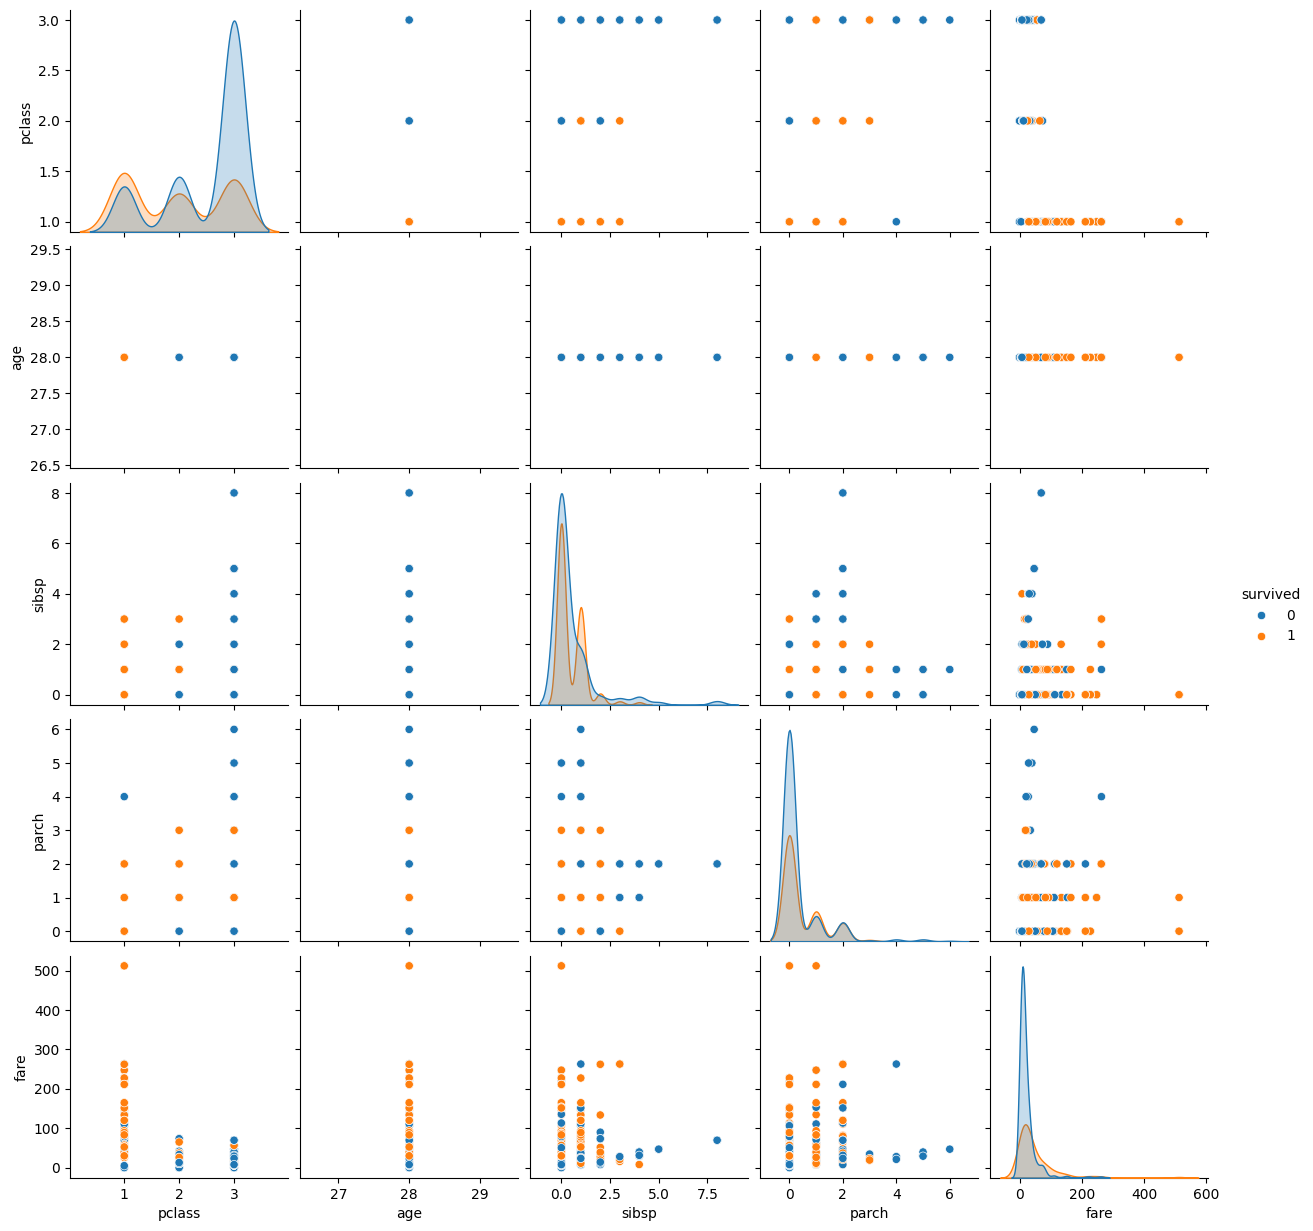

In [108]:
# lets plot the pairplot to see if any chart stands out 
import matplotlib.pyplot as plt


numerical_df = df.select_dtypes(include=['int64', 'float64', 'uint8'])

sns.pairplot(numerical_df , hue= 'survived')
plt.show()

In [109]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,28.0,1,0,7.2500,S,man,True,False
1,1,1,female,28.0,1,0,71.2833,C,woman,False,False
2,1,3,female,28.0,0,0,7.9250,S,woman,False,True
3,1,1,female,28.0,1,0,53.1000,S,woman,False,False
4,0,3,male,28.0,0,0,8.0500,S,man,True,True


In [110]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [111]:
# encode the data cahnge to numerical values 
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder

OR_Encoder = OrdinalEncoder()

# Change sex col to 0,1  

df['sex'] = OR_Encoder.fit_transform(df[['sex']])

#  astype(int) for adult male to 0 amd 1 , alone to 0 and 1 

df[['adult_male', 'alone']] = df[['adult_male', 'alone']].astype(int)



In [112]:


# Initialize OneHotEncoder
OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# One-hot encode the 'embarked' column
embarked_encoded = OHE.fit_transform(df[['embarked']])

# Get feature names (columns names for the one-hot encoded values)
embarked_columns = OHE.get_feature_names_out(['embarked'])

# Add the one-hot encoded columns to the DataFrame
df[embarked_columns] = embarked_encoded

# Optionally, drop the original 'embarked' column if you no longer need it
df.drop(columns=['embarked'], inplace=True)



In [114]:
# hot encode who 
who_encode  = OHE.fit_transform(df[['who']])

# Get feature names (columns names for the one-hot encoded values)

Who_cols = OHE.get_feature_names_out(['who'])

# Add the one-hot encoded columns to the DataFrame
df[Who_cols] = who_encode

# Optionally, drop the original 'who' column if you no longer need it
df.drop(columns=['who'], inplace=True)

In [120]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,1,28.0,1,0,7.2500,1,0,0,0,1,0,1,0
1,1,1,0,28.0,1,0,71.2833,0,0,1,0,0,0,0,1
2,1,3,0,28.0,0,0,7.9250,0,1,0,0,1,0,0,1
3,1,1,0,28.0,1,0,53.1000,0,0,0,0,1,0,0,1
4,0,3,1,28.0,0,0,8.0500,1,1,0,0,1,0,1,0


In [ ]:
# change to int for memory effiency 

cols_to_convert = [col for col in df.columns if col.startswith('embarked_') or col.startswith('who_')]
df[cols_to_convert] = df[cols_to_convert].astype(int)

df['sex'] = df['sex'].astype(int)

df

In [119]:
df.dtypes

survived        int64
pclass          int64
sex             int64
age           float64
sibsp           int64
parch           int64
fare          float64
adult_male      int64
alone           int64
embarked_C      int64
embarked_Q      int64
embarked_S      int64
who_child       int64
who_man         int64
who_woman       int64
dtype: object

In [122]:
# Initilize X and y variavle

X = df.drop('survived', axis=1)

y = df['survived']

print(f"Shape of X {X.shape}")
print(f"Shape of y {y.shape}")





Shape of X (889, 14)
Shape of y (889,)


In [124]:
# Split the dataset into 70% traning and 30% testing
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(f"Shape of X_train {X_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of y_test {y_test.shape}")



Shape of X_train (622, 14)
Shape of X_test (267, 14)
Shape of y_train (622,)
Shape of y_test (267,)


In [125]:
# Importing logistic regression and fitting data 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [128]:
y_pred = model.predict(X_test)


In [129]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8127340823970037
Confusion Matrix:
[[143  24]
 [ 26  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       167
           1       0.76      0.74      0.75       100

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



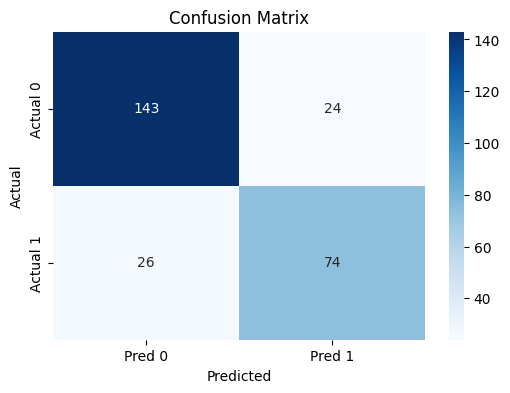

In [ ]:
# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

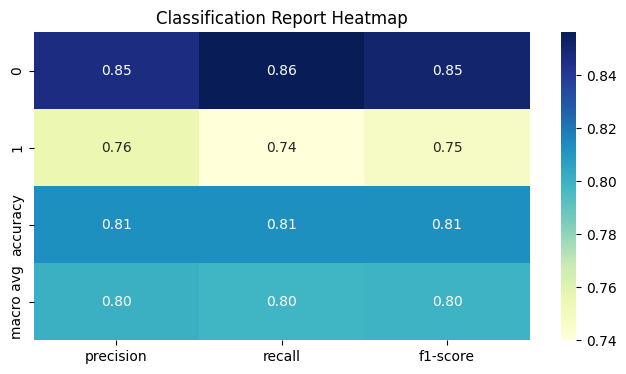

In [ ]:
# Generate report
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame 
report_df = pd.DataFrame(report_dict).transpose()

# Plot
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()